# Friction Hill

## Set Up Virtual Environment
The following creates a virtual environment folder for this project, sets it up correctly, and activates the virtual environment.

In [ ]:
import os
venvExists = os.path.isdir('venv')
if venvExists is False:
    os.mkdir("venv")
    os.system("python -m venv venv")
    os.system("pip install -r requirements.txt")
os.system(r"venv\Scripts\activate")

0

By convention the NumPy package is imported as ``np``.

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt

## Functions

In [ ]:
def get_pressure_slip(x, k, mu, h, b):
    pt1 = 2*mu/h
    pt2 = (0.5*b)-x
    pt3 = np.multiply(pt1,pt2)
    p_slip = 2*k*np.exp(pt3)
    return p_slip

def pressure_stick(x, k, h, b):
    pt1 = h**(-1)
    pt2 = (0.5*b)-x
    pt3 = np.multiply(pt1,pt2)
    p_stick = 2*k*(1 + pt3)
    return p_stick

def get_pressure_stick(x, k, mu, h, b):
    p_stick = pressure_stick(x, k, h, b)

    t = distance_transition(mu, h, b)

    # Correct so that the pressures meet in value
    p_stick_t = pressure_stick(t, k, h, b) - get_pressure_slip(t, k, mu, h, b)
    p_stick = p_stick-p_stick_t

    return p_stick

def distance_transition(mu, h, b):
    pt1 = h/(2*mu)
    pt2 = np.log(1/(2*mu))
    pt3 = pt1*pt2
    t = (b/2)-pt3
    # To avoid negative values
    t = max(t,0)
    return t

In [ ]:

# yline(2*k,'--','2k')

## User Inputs

Transition distance = 0.000 m
F_proper = 10.98368 MN
F_slip = 10.98368 MN


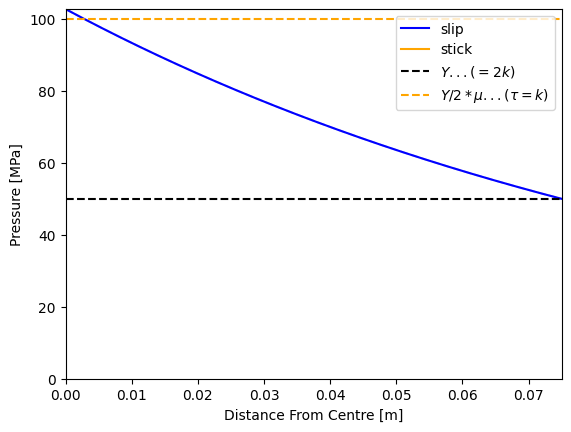

In [93]:
L = 1
b = 150E-3
h = 50E-3
k = 50E6/2
mu = 0.24

t = distance_transition(mu, h, b)
print(f"Transition distance = {t:.3f} m")

x_stick = np.linspace(0, t, 10000)
x_slip = np.linspace(t, b/2, 10000)

p_slip = get_pressure_slip(x_slip, k, mu, h, b)
p_stick = get_pressure_stick(x_stick, k, mu, h, b)

plt.plot(x_slip, p_slip/1E6, label='slip', c='blue')
plt.plot(x_stick, p_stick/1E6, label='stick', c='orange')
plt.ylabel('Pressure [MPa]')
plt.xlabel('Distance From Centre [m]')
plt.ylim(bottom=0)
plt.xlim(left=0, right=b/2)
plt.hlines(y=2*k/1E6, xmin=0, xmax=b/2, linestyles='dashed', label=r'$Y...(=2k)$', colors='black')
plt.hlines(y=4*k/1E6, xmin=0, xmax=b/2, linestyles='dashed', label=r'$Y/2*\mu...(\tau=k)$', colors='orange')
plt.legend()


f1 = np.trapezoid(p_stick, x_stick)
f2 = np.trapezoid(p_slip, x_slip)

f = 2*L*(f1+f2)
print(f'F_proper = {f/1E6:.5f} MN')

x_whole = np.linspace(0, b/2, 10000)
p_slip_whole = get_pressure_slip(x_whole, k, mu, h, b)
f_justSlip = 2*L*np.trapezoid(p_slip_whole, x_whole)
plt.plot(x_whole, p_slip_whole/1E6, label='slip whole', c='blue', ls='--', alpha=0.25)
plt.ylim(bottom=0, top=np.max(p_slip_whole/1E6))

print(f'F_slip = {f_justSlip/1E6:.5f} MN')